<a href="https://colab.research.google.com/github/afdmoraes/GEOSelper/blob/main/Exemplo_de_c%C3%B3digo_para_salvar_um_Raster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curso de Programação para Sensoriamento Remoto
---

* Gilberto Ribeiro de Queiroz
* Thales Sehn Körting

## Exemplo de código para salvar um Raster

Este é um exemplo para abrir uma imagem GeoTIFF, obter a matriz de pixels, alterar os valores dos pixels (por meio de um contraste, por exemplo), e salvar a matriz como um novo arquivo GeoTIFF.

Para manter as propriedades da imagem original, como SRID e retângulo envolvente, vamos copiar estas informações para o novo arquivo.

Podemos usar uma das imagens que já testamos no curso:
* [CBERS_4_PAN5M_20150712_154_126_L4_BAND1_crop.tif](https://drive.google.com/file/d/14roAvy251WSHph6r4_7TDiqGkFPwFxmg/view?usp=sharing)

Você deve baixar a imagem no seu computador, e fazer o upload neste colab.

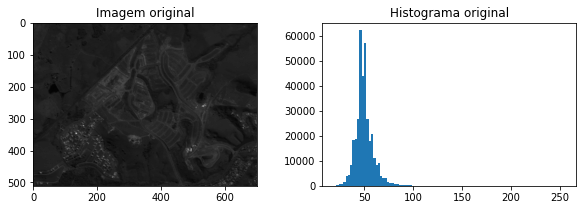

In [ ]:
# importar a biblioteca gdal e a matplotlib
from osgeo import gdal
import matplotlib.pyplot as plt

# informar o uso de excecoes
gdal.UseExceptions()

# abrir a imagem
dataset = gdal.Open('CBERS_4_PAN5M_20150712_154_126_L4_BAND1_crop.tif', gdal.GA_ReadOnly)

# obter a banda (neste caso a imagem só tem 1 banda)
banda = dataset.GetRasterBand(1)

# obter a matriz de pixels da banda
matriz = banda.ReadAsArray().astype(int)

# plotar a imagem e o histograma
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.imshow(matriz, cmap='gray')
plt.title('Imagem original');
plt.subplot(122)
plt.hist(matriz.flatten(), bins=100)
plt.title('Histograma original');

Para fazer o contraste, podemos multiplicar os pixels da matriz por um valor constante, e depois verificar se alguns pixels não ultrapassaram o limite (neste caso uma imagem de 8 bits, os valores válidos variam entre 0 e 255).

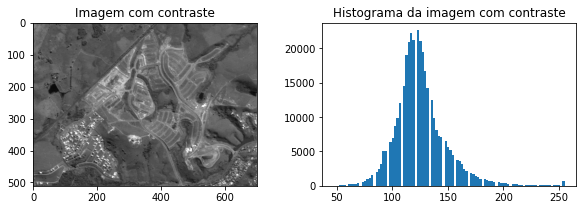

In [ ]:
# definir um valor de ganho e aplicar
ganho = 2.5
matriz_contraste = matriz * ganho

# verificar valores fora do limite
limite = 255
matriz_contraste[matriz_contraste > limite] = limite

plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.imshow(matriz_contraste, cmap='gray')
plt.title('Imagem com contraste');
plt.subplot(122)
plt.hist(matriz_contraste.flatten(), bins=100)
plt.title('Histograma da imagem com contraste');

Para salvar a nova imagem, contida na variável `matriz_contraste`, podemos aproveitar os metadados da imagem original, e informar a nova matriz.

In [ ]:
# definir o nome do arquivo de saída
nome_do_arquivo = 'imagem_com_contraste.tif'
# definir driver, neste caso GeoTIFF
driver = gdal.GetDriverByName('GTiff')

# obter metadados da imagem original
linhas = dataset.RasterYSize
colunas = dataset.RasterXSize
bandas = dataset.RasterCount
tipo_de_dados = dataset.GetRasterBand(1).DataType

# criar novo dataset
dataset_novo = driver.Create(nome_do_arquivo, 
                               colunas, 
                               linhas, 
                               bandas, 
                               tipo_de_dados)
# copiar informações espaciais da banda já existente
dataset_novo.SetGeoTransform(dataset.GetGeoTransform())
# copiar informações de projeção
dataset_novo.SetProjection(dataset.GetProjectionRef())
# escrever dados da matriz_contraste na banda
dataset_novo.GetRasterBand(1).WriteArray(matriz_contraste)
# salvar valores
dataset_novo.FlushCache()
# fechar dataset
dataset_novo = None

Verifique na aba de arquivos ao lado (pode ser necessário atualizar) o novo arquivo `imagem_com_contraste.tif`. Você pode abrir os 2 arquivos num SIG, e confirmar se o salvamento foi adequado.